# IEEE Fraud Detection (Kaggle Current Competition)

Training Part:\
train_transaction\
train_identity


Testing Part:\
test_transaction\
test_identity

Dataset can be downloaded via:\
https://www.kaggle.com/c/ieee-fraud-detection/data



In [250]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]
from bokeh.plotting import figure
from bokeh.models import HoverTool, ColumnDataSource, Span
from bokeh.io import show, output_file, output_notebook
from bokeh.layouts import gridplot
from bokeh.models.widgets import Panel, Tabs
import myfunc_pd as mfunc

# Data statement ###

The dataset is used to detect the transaction is fraud or not. Thus, the target of this project is to find the probability of fraud transaction.

The dataset is divided into two parts, transactions and identify, some of data can be connected by using TransactionID.


In [144]:
# Read the trian and test dataset.
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

In [4]:
train_identity.head()

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

In [5]:
train_transaction.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [6]:
# Check the dataset shape in each dataset.

print('train_transaction shape is {}'.format(train_transaction.shape))
print('test_transaction shape is {}'.format(test_transaction.shape))
print('train_identity shape is {}'.format(train_identity.shape))
print('test_identity shape is {}'.format(test_identity.shape))



# Here we confirm that all of the transactions in `train_identity`
print(np.sum(train_transaction['TransactionID'].isin(train_identity['TransactionID'].unique())))
print(np.sum(test_transaction['TransactionID'].isin(test_identity['TransactionID'].unique())))

train_transaction shape is (590540, 394)
test_transaction shape is (506691, 393)
train_identity shape is (144233, 41)
test_identity shape is (141907, 41)
144233
141907


# The key (meaningful) features analysis

### The time-relationship between train and test dataset #

As we are provided two seperate datasets, which are train and test dataset, here we will tey to plot the date relationship between these two datasets. 
The date is transformed to some numerical values, but we could still use them to find some info:

The result shows these two datasets are splited by time.


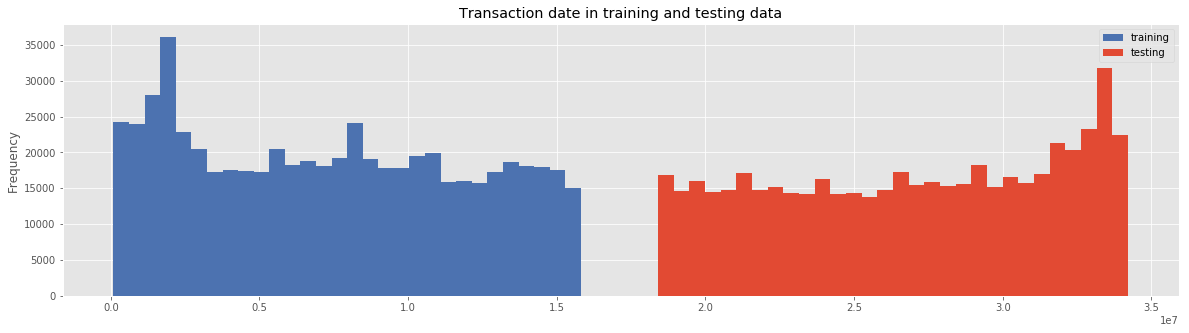

In [7]:
train_transaction['TransactionDT'].plot(kind = 'hist', bins=30, figsize=(20,5),\
                                       title='Transaction date in training and testing data',\
                                       label='training',\
                                       color=sns.color_palette("deep", 3))

test_transaction['TransactionDT'].plot(kind = 'hist', label='testing',bins=30)
plt.legend()
plt.show()

In [251]:
# Do the normalization for feature TransactionDT:
mfunc.Normalise(train_transaction,'TransactionDT')
train_transaction['TransactionDT'].describe()

*******************************************
Finish the normalization for column: TransactionDT
*******************************************



count    590540.000000
mean          0.463341
std           0.293628
min           0.000000
25%           0.187008
50%           0.459157
75%           0.709724
max           1.000000
Name: TransactionDT, dtype: float64

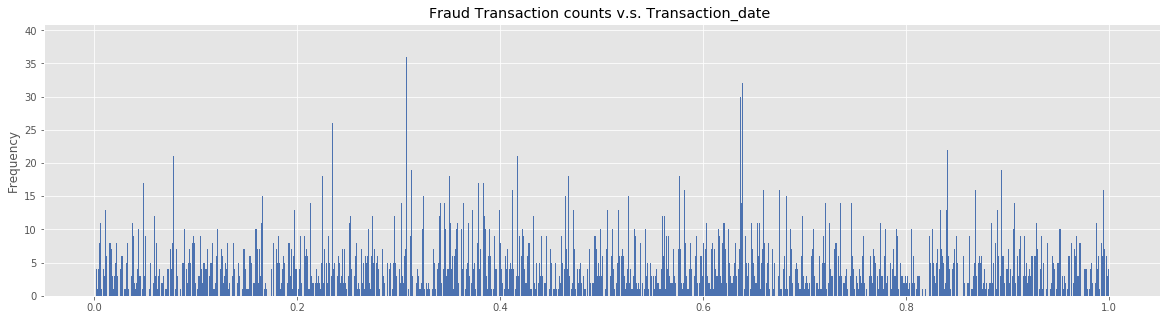

In [110]:
# The way to show the histogram about transaction (fraud or non-fraud)
# the result shows there are some peaks along the whole period.
train_transaction.loc[train_transaction['isFraud']==1]['TransactionDT'].\
plot(kind = 'hist', bins=5000, figsize=(20,5),\
                                       title='Fraud Transaction counts v.s. Transaction_date ',\
                                       label='training',\
                                       color=sns.color_palette("deep", 1))

The figure give us a visual solution about Fraud transactions during the whole period.

We could see there are several peaks in specific time, which we will explore later

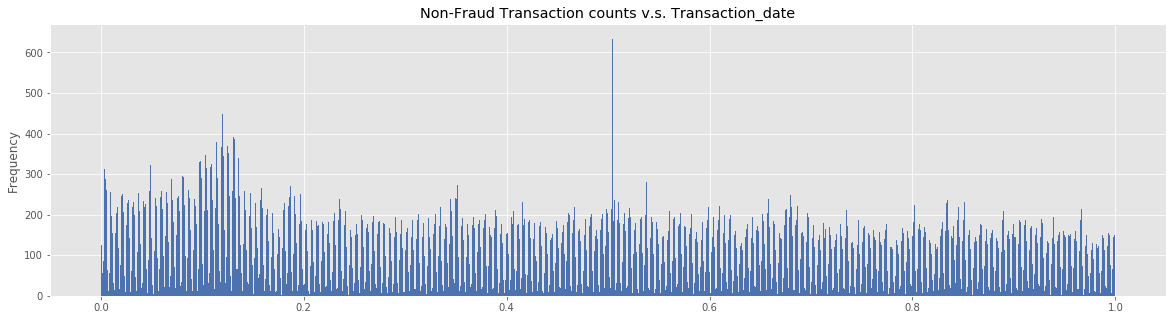

In [111]:
# Plotting the non-fraud transactions during the whole period.
train_transaction.loc[train_transaction['isFraud']==0]['TransactionDT'].\
plot(kind = 'hist', bins=5000, figsize=(20,5),\
                                       title='Non-Fraud Transaction counts v.s. Transaction_date',\
                                       label='training',\
                                       color=sns.color_palette("deep", 3))

The same figure plot for Non-fraud transactions, always some peaks during the whole period

In [205]:
# Processing date from reference:
#https://www.kaggle.com/kevinbonnes/transactiondt-starting-at-2017-12-01

import datetime
START_DATE = '2017-12-01'
# df = pd.concat([train_transaction, test_transaction], axis = 0, sort = False)
df = train_transaction.merge(train_identity, how='left', on='TransactionID')
# Preprocess date column
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
df['TransactionDT'] = df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

print(df['TransactionDT'].head(10))
print(df['TransactionDT'].tail(10))

0   2017-12-02 00:00:00
1   2017-12-02 00:00:01
2   2017-12-02 00:01:09
3   2017-12-02 00:01:39
4   2017-12-02 00:01:46
5   2017-12-02 00:01:50
6   2017-12-02 00:02:02
7   2017-12-02 00:02:09
8   2017-12-02 00:02:15
9   2017-12-02 00:02:16
Name: TransactionDT, dtype: datetime64[ns]
590530   2018-06-01 23:55:26
590531   2018-06-01 23:55:35
590532   2018-06-01 23:56:47
590533   2018-06-01 23:57:09
590534   2018-06-01 23:57:10
590535   2018-06-01 23:57:27
590536   2018-06-01 23:57:29
590537   2018-06-01 23:57:59
590538   2018-06-01 23:58:08
590539   2018-06-01 23:58:51
Name: TransactionDT, dtype: datetime64[ns]


The reference found from the kaggle kennel.
Here we do assumptions that the transaction will be the last year.

By applying this idea, we could use the date package to predict the time, which shows above.

In [241]:
# Apply the different aspect into the new columns according to the date format.
df['Year'] = pd.to_datetime(df['TransactionDT']).dt.year
df['Month'] = pd.to_datetime(df['TransactionDT']).dt.month
df['Day'] = pd.to_datetime(df['TransactionDT']).dt.day
df['Hour'] = pd.to_datetime(df['TransactionDT']).dt.hour
df['Dayofweek'] = pd.to_datetime(df['TransactionDT']).dt.dayofweek


In [245]:
# Show the new columns
df[['Year','Month','Day','Hour','Dayofweek']].tail(5)

Year  Month  Day  Hour  Dayofweek
590535  2018      6    1    23          4
590536  2018      6    1    23          4
590537  2018      6    1    23          4
590538  2018      6    1    23          4
590539  2018      6    1    23          4

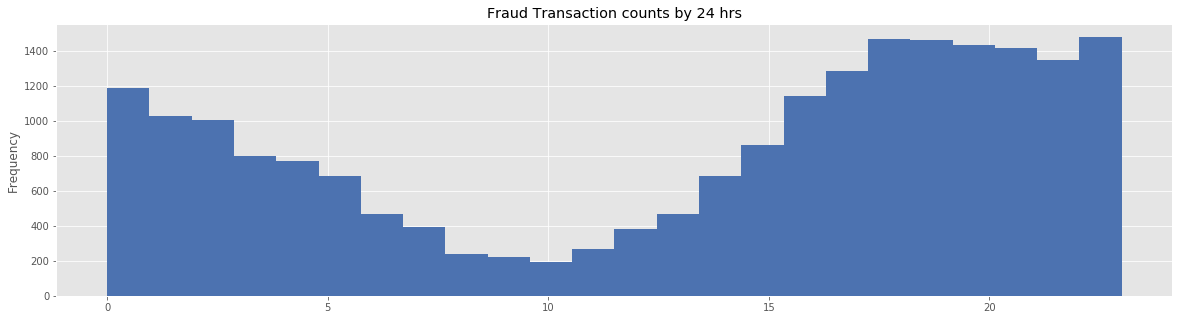

In [228]:
# Fraud transaction counting by 24hrs
df.loc[df['isFraud']==1]['Hour'].\
plot(kind = 'hist', bins=24, figsize=(20,5),\
                                       title='Fraud Transaction counts by 24 hrs',\
                                       label='training',\
                                       color=sns.color_palette("deep", 3))


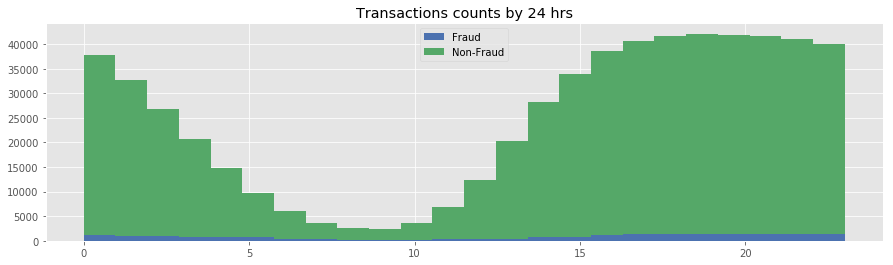

In [252]:
# Fraud and Non-Fraud transactions count by 24 hrs
plt.style.use('seaborn-deep')

x = df.loc[df['isFraud']==1]['Hour']
y = df.loc[df['isFraud']==0]['Hour']
bins = 24
plt.figure(figsize=(15,4))
plt.title('Transactions counts by 24 hrs')
plt.hist([x, y], bins, label=['Fraud', 'Non-Fraud'],stacked=True)

plt.legend(loc='best')
plt.show()


As has shown, there are more fraud transactions occurs on night.

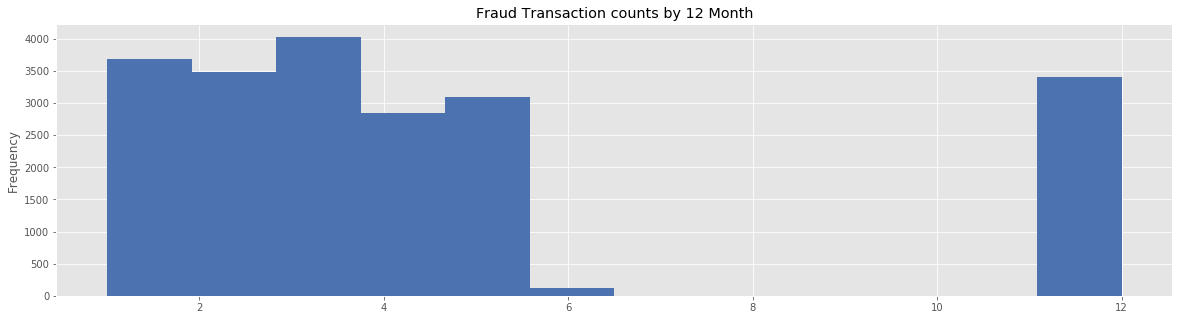

In [233]:
# Fraud transaction counting by 12 months
# We only have 12/2017 - 06/2018 for training dataset
df.loc[df['isFraud']==1]['Month'].\
plot(kind = 'hist', bins=12, figsize=(20,5),\
                                       title='Fraud Transaction counts by 12 Month',\
                                       label='training',\
                                       color=sns.color_palette("deep", 3))


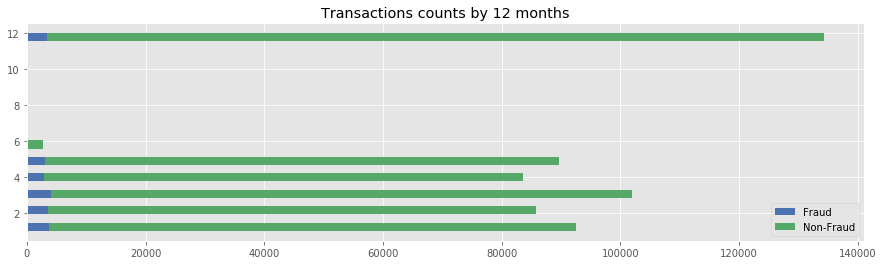

In [237]:
# Fraud and Non-Fraud transactions count by 12 months
plt.style.use('seaborn-deep')

x = df.loc[df['isFraud']==1]['Month']
y = df.loc[df['isFraud']==0]['Month']
bins = 24
plt.figure(figsize=(15,4))
plt.title('Transactions counts by 12 months')
plt.hist([x, y], bins, label=['Fraud', 'Non-Fraud'],stacked=True,orientation='horizontal')

plt.legend(loc='best')
plt.show()

As the training dataset only has 6 months data(include a little bit june)

It can be found that the most fraud transactions happens on December and March.

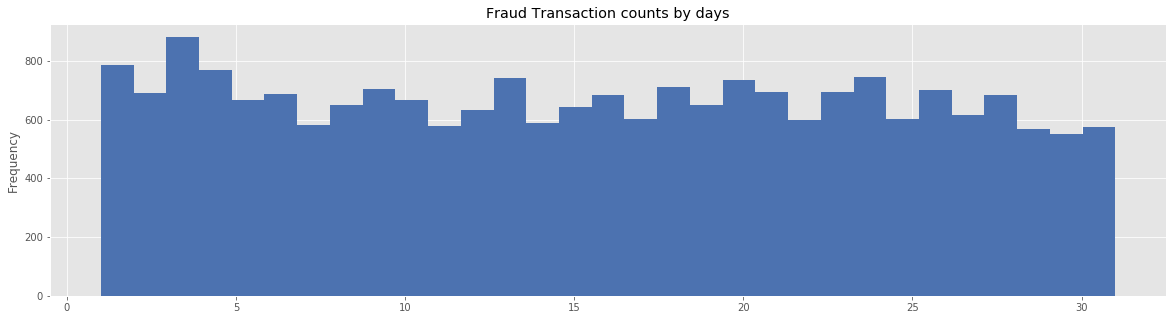

In [239]:
# Fraud transaction counting by Days
# as differnt month have different days, which means this dose not make too much sense.
df.loc[df['isFraud']==1]['Day'].\
plot(kind = 'hist', bins=31, figsize=(20,5),\
                                       title='Fraud Transaction counts by days',\
                                       label='training',\
                                       color=sns.color_palette("deep", 3))

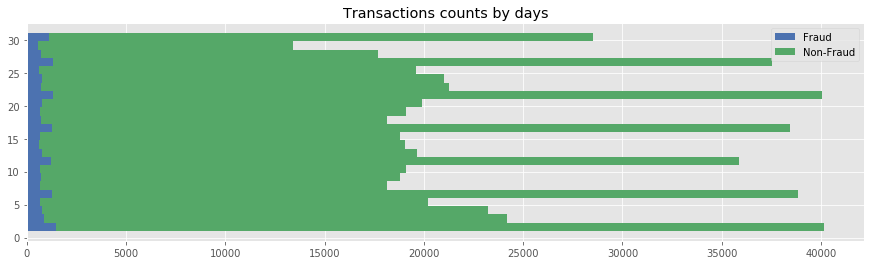

In [240]:
# Fraud transaction counting by Days
# as differnt month have different days, which means this dose not make too much sense.
plt.style.use('seaborn-deep')

x = df.loc[df['isFraud']==1]['Day']
y = df.loc[df['isFraud']==0]['Day']
bins = 24
plt.figure(figsize=(15,4))
plt.title('Transactions counts by days')
plt.hist([x, y], bins, label=['Fraud', 'Non-Fraud'],stacked=True,orientation='horizontal')

plt.legend(loc='best')
plt.show()

There are some peaks for non-fraud transactions (31, 26, 22, 17, etc.)

The fraud tansactions seem to happen more in 4th day of the month

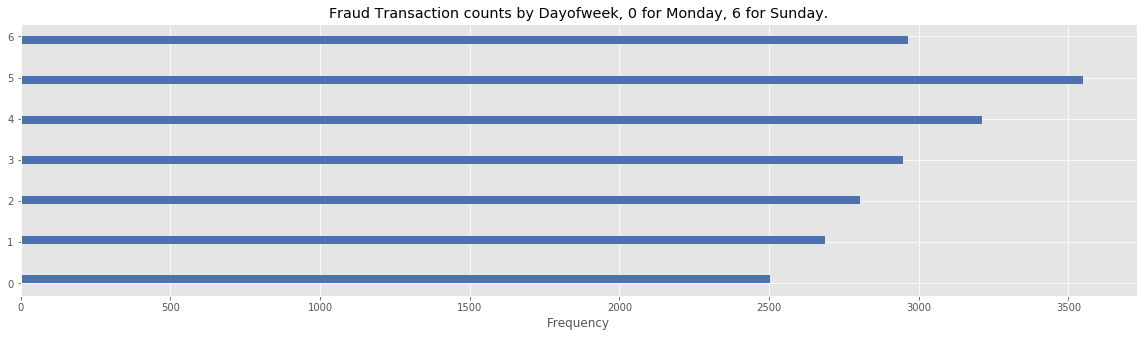

In [249]:
# Fraud transaction counting by Dayofweek
#0 for Monday, 6 for Sunday.
df.loc[df['isFraud']==1]['Dayofweek'].\
plot(kind = 'hist', bins=31, figsize=(20,5),\
                                       title='Fraud Transaction counts by Dayofweek, 0 for Monday, 6 for Sunday.',\
                                       label='training',orientation='horizontal',
                                       color=sns.color_palette("deep", 3))

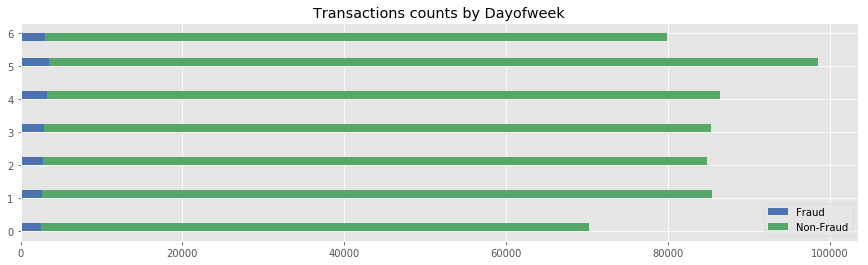

In [247]:
# Fraud transaction counting by Dayofweek

plt.style.use('seaborn-deep')

x = df.loc[df['isFraud']==1]['Dayofweek']
y = df.loc[df['isFraud']==0]['Dayofweek']
bins = 24
plt.figure(figsize=(15,4))
plt.title('Transactions counts by Dayofweek')
plt.hist([x, y], bins, label=['Fraud', 'Non-Fraud'],stacked=True,orientation='horizontal')

plt.legend(loc='best')
plt.show()

Fraud transaction counting by Dayofweek

0 for Monday, 6 for Sunday.

Friday, Saturday, Sunday has the most fraud transactions occured.

### Checkout the distribution of targeting feature (Fraud) in training datasets.

As the description mentioned, the targeting output is Fraud, which means the project is classification one. Here we will find the data distribution in terms of fraud feature.

The result shows the dataset is highly unblanced one.

         TransactionID    percent
isFraud                          
0               569877  96.500999
1                20663   3.499001


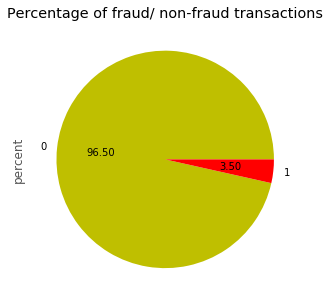

In [7]:
fraud_distribution = train_transaction.groupby('isFraud').TransactionID.count()
fraud_distribution = pd.DataFrame(fraud_distribution)
fraud_distribution['percent'] = fraud_distribution/fraud_distribution.sum()*100
print(fraud_distribution)

# Plot the dataset distribution in terms of Fraud.
fraud_distribution['percent'].plot(kind='pie', figsize=(5,5), colors=['y','r'],autopct='%.2f',\
                                   title='Percentage of fraud/ non-fraud transactions'
                                  )
plt.show()



96.5% Normal transactions V.S. 3.5% Fraud transactions.

Unbalenced Dataset

### Transactions amount analysis

Using log10 to plot the result, which could be visible compared to directly plot due to some large transaction amount.

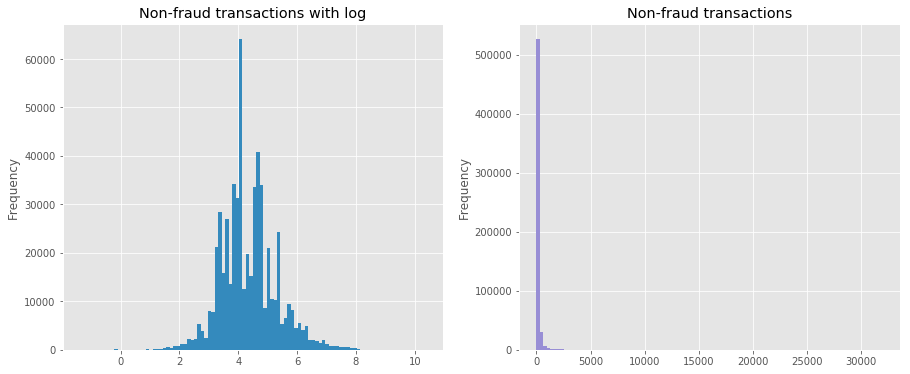

In [8]:
# Ploting the non-fraud transactions 
# left-side with log(e); right-side for normal counts.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

train_transaction.loc[train_transaction['isFraud']==0]['TransactionAmt']\
.apply(np.log).plot(kind='hist', ax=ax1,bins=100,color=color_pal[1],title='Non-fraud transactions with log')
train_transaction.loc[train_transaction['isFraud']==0]['TransactionAmt']\
.plot(kind='hist', ax=ax2,bins=100,color=color_pal[2],title='Non-fraud transactions')

plt.show()
                                                                                             

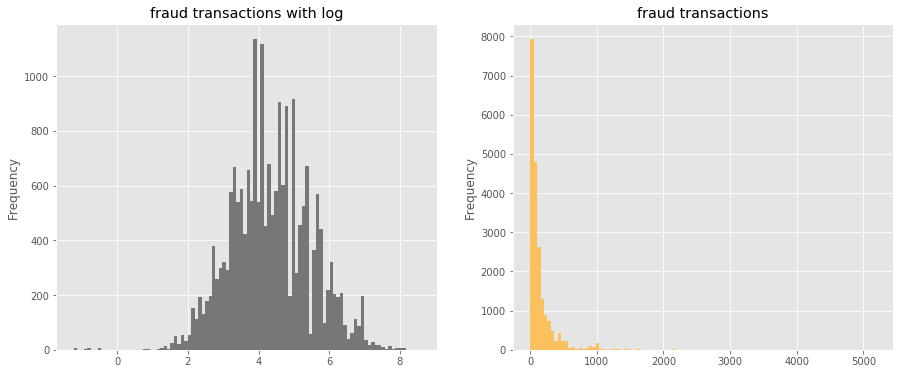

In [9]:
# Ploting the fraud transactions 
# left-side with log(e); right-side for normal counts.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

train_transaction.loc[train_transaction['isFraud']==1]['TransactionAmt']\
.apply(np.log).plot(kind='hist', color=color_pal[3],ax=ax1,bins=100,title='fraud transactions with log')
train_transaction.loc[train_transaction['isFraud']==1]['TransactionAmt']\
.plot(kind='hist', ax=ax2,bins=100,color=color_pal[4],title='fraud transactions')

plt.show()

Transactions amount distribution could be found in log-scale.

Most amount are below 500 dollars.

### Checkout the relationship between Fraud/non-fraud transactions with Date



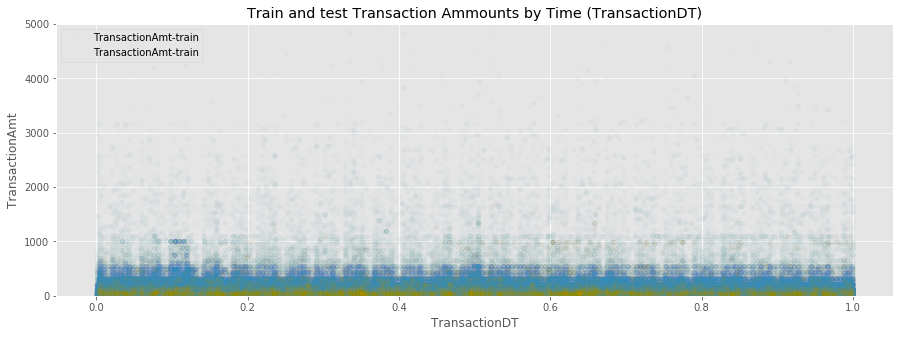

In [126]:
ax = train_transaction.plot(x='TransactionDT',
                       y='TransactionAmt',
                       kind='scatter',
                       alpha=0.01,
                       label='TransactionAmt-train',
                       title='Train and test Transaction Ammounts by Time (TransactionDT)',
                       ylim=(0, 5000),
                       figsize=(15, 5))

# Plot Fraud as Orange
train_transaction.loc[train_transaction['isFraud'] == 1] \
    .plot(x='TransactionDT',
         y='TransactionAmt',
         kind='scatter',
         alpha=0.01,
         label='TransactionAmt-train',
         title='Train and test Transaction Ammounts by Time (TransactionDT)',
         ylim=(0, 5000),
         color='orange',
         figsize=(15, 5),
         ax=ax)
plt.show()

 it is easily to find out that most of fraud transactions is a small amount compared with the whole transaction distribution.


### ['ProductCD'] explore



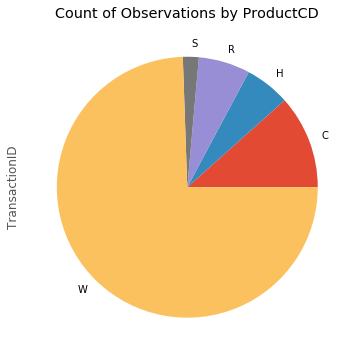

In [11]:
# Cuounting for the transactions based on different products.
train_transaction.groupby('ProductCD')\
['TransactionID'].count().plot(kind='pie',figsize=(6, 6),\
                                title='Count of Observations by ProductCD')
plt.show()

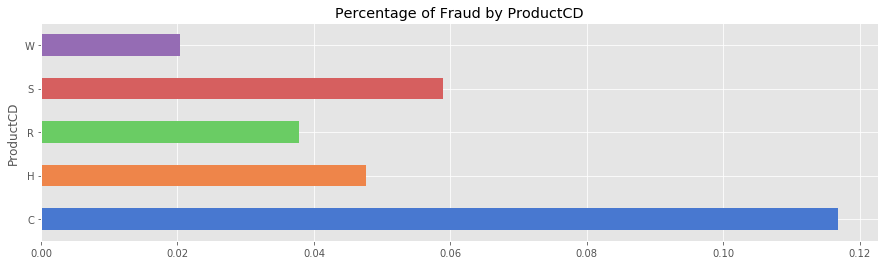

In [12]:
# Ploting the percentage of the fraud transactions in terms of different types.
train_transaction.groupby('ProductCD')['isFraud'] \
    .mean() \
    .plot(kind='barh',
          figsize=(15, 4),
         title='Percentage of Fraud by ProductCD',\
         color=sns.color_palette("muted", 8))
plt.show()

In productCD, the largest part is W, second largest part is C, the smallest part is S.

However, the most fraud-transactions occurs with typeC.

### ['card4'] explore



### Cuounting for the transactions based on different cards.
train_transaction.groupby('card4')\
['TransactionID'].count().plot(kind='pie',figsize=(6, 6),\
                                title='Count of Observations by cards')
plt.show()

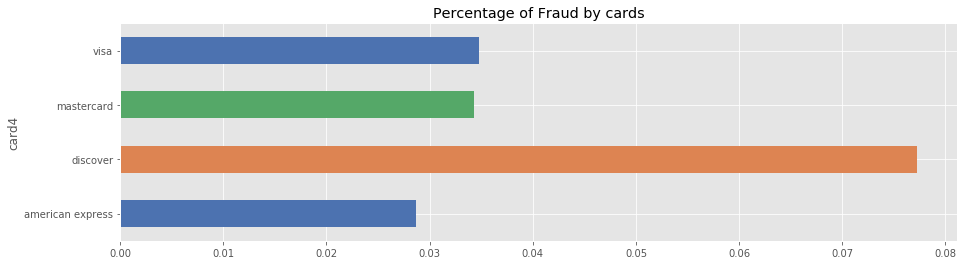

In [14]:
# Ploting the percentage of the fraud transactions in terms of different cards.
train_transaction.groupby('card4')['isFraud'] \
    .mean() \
    .plot(kind='barh',
          figsize=(15, 4),
         title='Percentage of Fraud by cards',\
         color=sns.color_palette("deep", 3))
plt.show()

Visa card is the most commonly used cards in the dataset.


The highest Fraud transactions occurs with card type of discover.

### ['card6'] explore


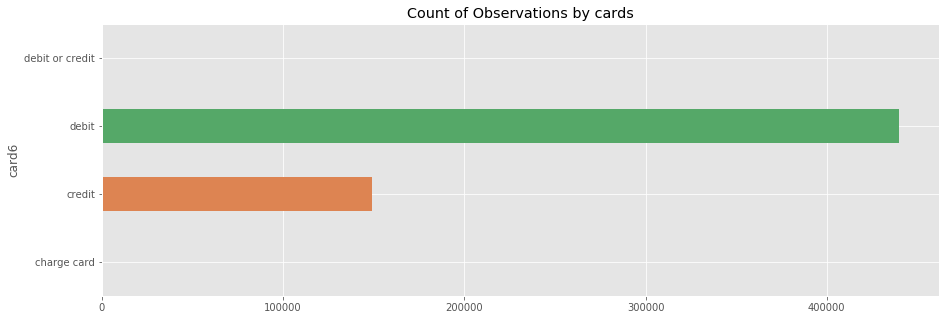

In [15]:
# Cuounting for the transactions based on different cards.
train_transaction.groupby('card6')\
['TransactionID'].count().plot(kind='barh',figsize=(15, 5),\
                                title='Count of Observations by cards',\
                              color=sns.color_palette("deep", 3))
plt.show()

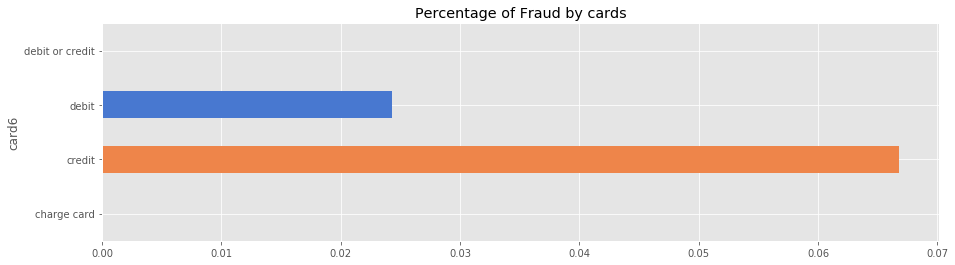

In [16]:
# Ploting the percentage of the fraud transactions in terms of different cards.
train_transaction.groupby('card6')['isFraud'] \
    .mean() \
    .plot(kind='barh',
          figsize=(15, 4),
         title='Percentage of Fraud by cards',\
         color=sns.color_palette("muted", 2))
plt.show()


Debit card is the most commonly used card;

The highest percentage of fraud transactions occurs with credit card.

### Addr1 & Addr2 Explore



In [17]:
print('addr1 - has {} NA values \n  {:.2f}% of total value\n'.format(train_transaction['addr1'].isna().sum(),\
                                                           train_transaction['addr1'].isna().sum()/590540*100))
print('addr2 - has {} NA values \n  {:.2f}% of total value'.format(train_transaction['addr2'].isna().sum(),\
                                        train_transaction['addr2'].isna().sum()/590540*100))

addr1 - has 65706 NA values 
  11.13% of total value

addr2 - has 65706 NA values 
  11.13% of total value


### 

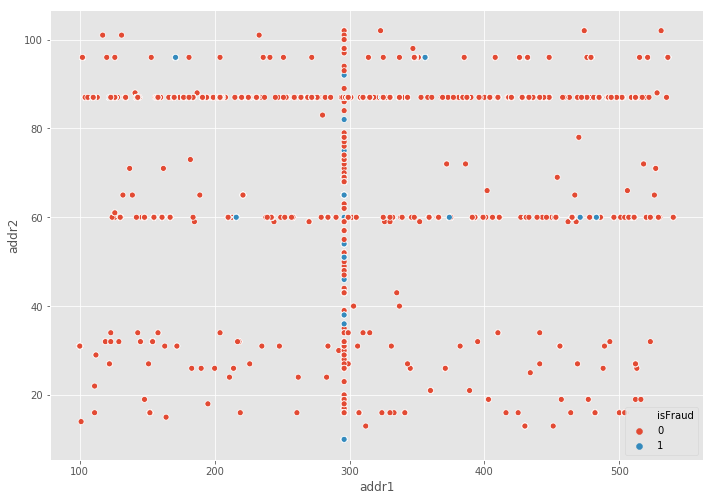

In [18]:
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)

ax = sns.scatterplot(x="addr1", y="addr2", hue="isFraud",data=train_transaction)

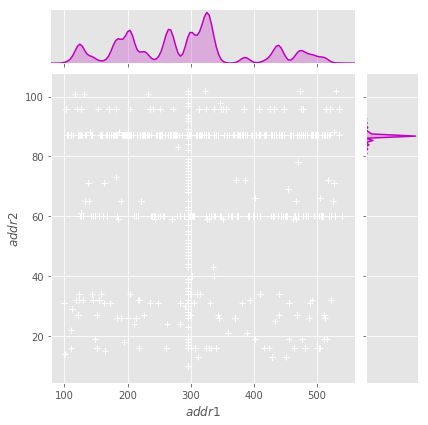

In [19]:

g = sns.jointplot(x='addr1', y='addr2', data=train_transaction, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$addr1$", "$addr2$");

Addr1 and Addr2 have been converted into numerical data:
(Guess this is longitude and latitude)
Here, we are using scatter plot to show the relationship with 'Fraud' variable.

It is easily to see that most fraud transactions occur with addr1 at around 300,
some with addr2 at around 60.

# dist1 & dist2 Explore



In [20]:
print('dist1 - has {} NA values \n  {:.2f}% of total value\n'.format(train_transaction['dist1'].isna().sum(),\
                                                           train_transaction['dist1'].isna().sum()/590540*100))
print('dist2 - has {} NA values \n  {:.2f}% of total value'.format(train_transaction['dist2'].isna().sum(),\
                                        train_transaction['dist2'].isna().sum()/590540*100))

dist1 - has 352271 NA values 
  59.65% of total value

dist2 - has 552913 NA values 
  93.63% of total value


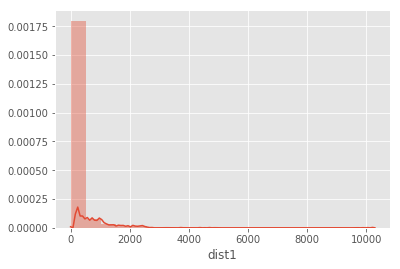

In [21]:
sns.distplot(train_transaction['dist1'], bins=20, kde=True, rug=False);

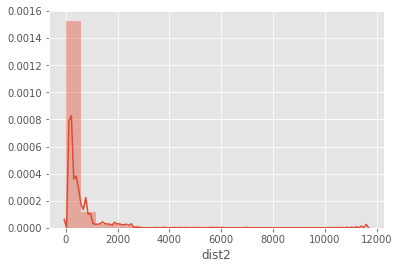

In [22]:
sns.distplot(train_transaction['dist2'], bins=20, kde=True, rug=False);

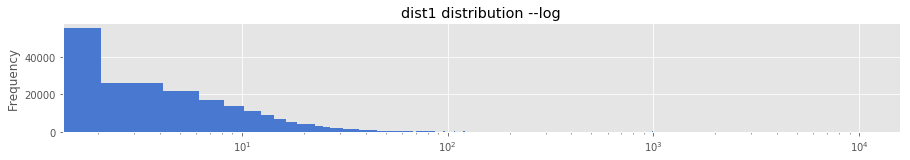

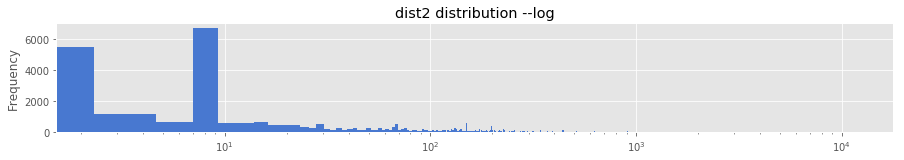

In [23]:
train_transaction['dist1'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist1 distribution --log',
                                color=sns.color_palette("muted", 2),
                                logx=True)
plt.show()
train_transaction['dist2'].plot(kind='hist',
                                bins=5000,
                                figsize=(15, 2),
                                title='dist2 distribution --log',
                                color=sns.color_palette("muted", 9),
                                logx=True)
plt.show()

Same guess as the address feature, the distance shows the fraud detection distance.

dist2 has a very large percentage of non-value, more than 90%, which is strange.

### DeviceType from identify dataset:

In [87]:
print('DeviceType - has {} NA values   {:.2f}% of total value'\
          .format(train_identity['DeviceType'].isna().sum(),\
                  train_identity['DeviceType'].isna().sum()/590540*100))

DeviceType - has 3423 NA values   0.58% of total value


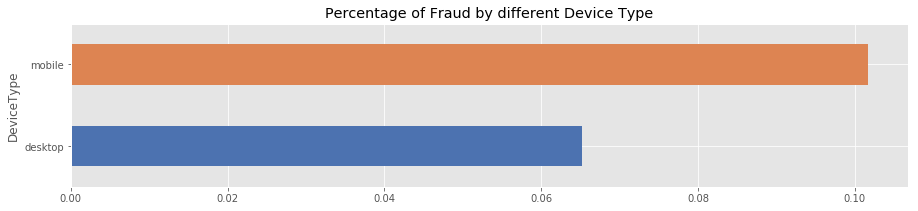

In [84]:
# We will merge the 'TransactionID','TransactionDT','isFraud' to the identify dataset to help us to analysis:

train_identity_ = train_identity.merge(train_transaction[['TransactionID',
                                                         'TransactionDT',
                                                         'isFraud']],
                                       on=['TransactionID'])
train_identity_.groupby('DeviceType') \
    .mean()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 3),
          color=sns.color_palette("deep", 3),
          title='Percentage of Fraud by different Device Type')
plt.show()

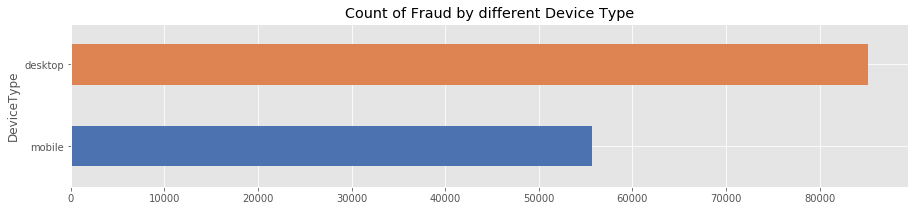

In [86]:
train_identity_.groupby('DeviceType') \
    .count()['isFraud'] \
    .sort_values() \
    .plot(kind='barh',
          figsize=(15, 3),
          color=sns.color_palette("deep", 3),
          title='Count of Fraud by different Device Type')
plt.show()

Mobile has more fraud transactions than desktop 

### DeviceInfo from identify dataset:

In [88]:
print('DeviceInfo - has {} NA values   {:.2f}% of total value'\
          .format(train_identity['DeviceInfo'].isna().sum(),\
                  train_identity['DeviceInfo'].isna().sum()/590540*100))

DeviceInfo - has 25567 NA values   4.33% of total value


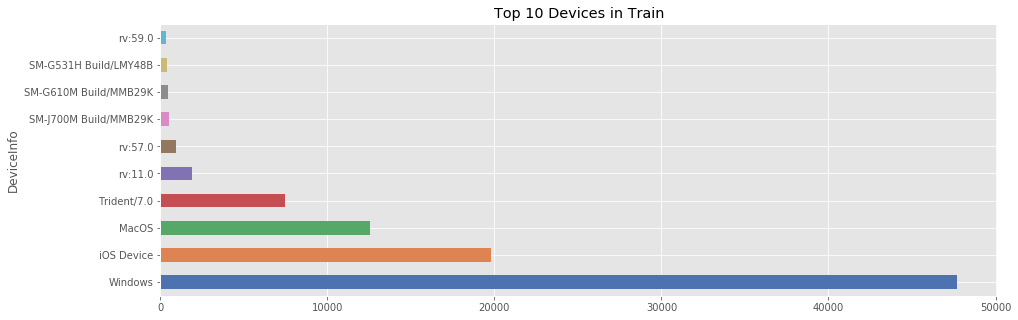

In [100]:
train_identity_.groupby('DeviceInfo') \
    .count()['TransactionID'] \
    .sort_values(ascending=False) \
    .head(10) \
    .plot(kind='barh', figsize=(15, 5),
          color=sns.color_palette("deep", 10),
          title='Top 10 Devices in Train')
plt.show()

The top 10 Devices that we can found from Device info

# Other features explore:

### Card 1 - 6:

As we have explored the card4 and card6, here we will focus on numerical features: card 1,2,3,5. 

We will fill nan value by each feature's mean.


In [24]:
card_cols_num = ['card1','card2','card3','card5']
train_transaction[card_cols_num].head()

card1  card2  card3  card5
0  13926    NaN  150.0  142.0
1   2755  404.0  150.0  102.0
2   4663  490.0  150.0  166.0
3  18132  567.0  150.0  117.0
4   4497  514.0  150.0  102.0

In [25]:
# Check out the missing values, which shows a good columns with a little bit missing values
for col in card_cols_num:
    
    print('{} - has {} NA values \n  {:.2f}% of total value\n'\
          .format(col, train_transaction[col].isna().sum(),\
                  train_transaction[col].isna().sum()/590540*100))
    print('Filling nan value for {} by its mean value\n'.format(col))
    train_transaction[col].fillna(train_transaction[col].mean(),inplace=True)
    print('{} - has {} NA values \n  {:.2f}% of total value\n'\
          .format(col, train_transaction[col].isna().sum(),\
                  train_transaction[col].isna().sum()/590540*100))
    


card1 - has 0 NA values 
  0.00% of total value

Filling nan value for card1 by its mean value

card1 - has 0 NA values 
  0.00% of total value

card2 - has 8933 NA values 
  1.51% of total value

Filling nan value for card2 by its mean value

card2 - has 0 NA values 
  0.00% of total value

card3 - has 1565 NA values 
  0.27% of total value

Filling nan value for card3 by its mean value

card3 - has 0 NA values 
  0.00% of total value

card5 - has 4259 NA values 
  0.72% of total value

Filling nan value for card5 by its mean value

card5 - has 0 NA values 
  0.00% of total value



In [26]:
train_transaction[card_cols_num].head()

card1       card2  card3  card5
0  13926  362.555488  150.0  142.0
1   2755  404.000000  150.0  102.0
2   4663  490.000000  150.0  166.0
3  18132  567.000000  150.0  117.0
4   4497  514.000000  150.0  102.0

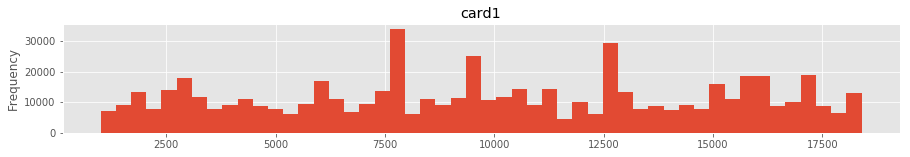

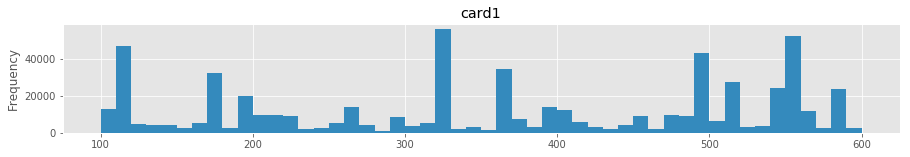

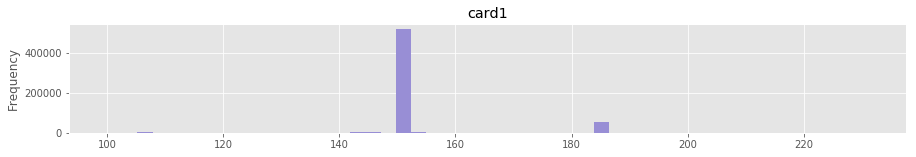

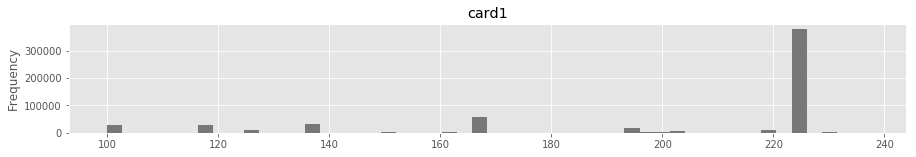

In [36]:
color_num = 0
for col in card_cols_num:
    
    train_transaction[col].plot(kind='hist',
                                      title=c,
                                      bins=50,
                                      figsize=(15, 2),
                                      color=color_pal[color_num])
    color_num += 1
    plt.show()

### C1 - C14 Explore:

There are a lot numerical features in the dataset, we will choose 1000 samples from fraud and 
1000 samples from non-fraud, and then using pair plot to see if there is any collrelations between each features.



In [256]:
sampled_train = pd.concat([train_transaction.loc[train_transaction['isFraud'] == 0]\
                           .sample(500),\
                           train_transaction.loc[train_transaction['isFraud'] == 1]\
                           .sample(500)])
sampled_train.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
149225        3136225        0       0.190587          20.755         C   
557449        3544449        0       0.932684          45.495         C   
313135        3300135        0       0.489633          29.000         W   
385930        3372930        0       0.609503          35.346         C   
130950        3117950        0       0.159320           9.678         C   

        card1  card2  card3       card4  card5  ... V330  V331  V332  V333  \
149225   2800  555.0  149.0  mastercard  224.0  ...  NaN   NaN   NaN   NaN   
557449   7099  545.0  185.0        visa  195.0  ...  NaN   NaN   NaN   NaN   
313135   4663  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   
385930  15885  545.0  185.0        visa  138.0  ...  NaN   NaN   NaN   NaN   
130950   8755  500.0  185.0  mastercard  224.0  ...  NaN   NaN   NaN   NaN   

        V334 V335 V336  V337  V338  V339  
149225   NaN  NaN  NaN   NaN   NaN   NaN  
557449   NaN  NaN  NaN   NaN   NaN   NaN  
313135   NaN  NaN  NaN   NaN   NaN   NaN  
385930   NaN  NaN  NaN   NaN   NaN   NaN  
130950   NaN  NaN  NaN   NaN   NaN   NaN  

[5 rows x 394 columns]

In [257]:
# Checking the missing values for C1-C14:

for col in c_col:
    
    print('{} - has {} NA values   {:.2f}% of total value'\
          .format(col, train_transaction[col].isna().sum(),\
                  train_transaction[col].isna().sum()/590540*100))
    

C1 - has 0 NA values   0.00% of total value
C2 - has 0 NA values   0.00% of total value
C3 - has 0 NA values   0.00% of total value
C4 - has 0 NA values   0.00% of total value
C5 - has 0 NA values   0.00% of total value
C6 - has 0 NA values   0.00% of total value
C7 - has 0 NA values   0.00% of total value
C8 - has 0 NA values   0.00% of total value
C9 - has 0 NA values   0.00% of total value
C10 - has 0 NA values   0.00% of total value
C11 - has 0 NA values   0.00% of total value
C12 - has 0 NA values   0.00% of total value
C13 - has 0 NA values   0.00% of total value
C14 - has 0 NA values   0.00% of total value


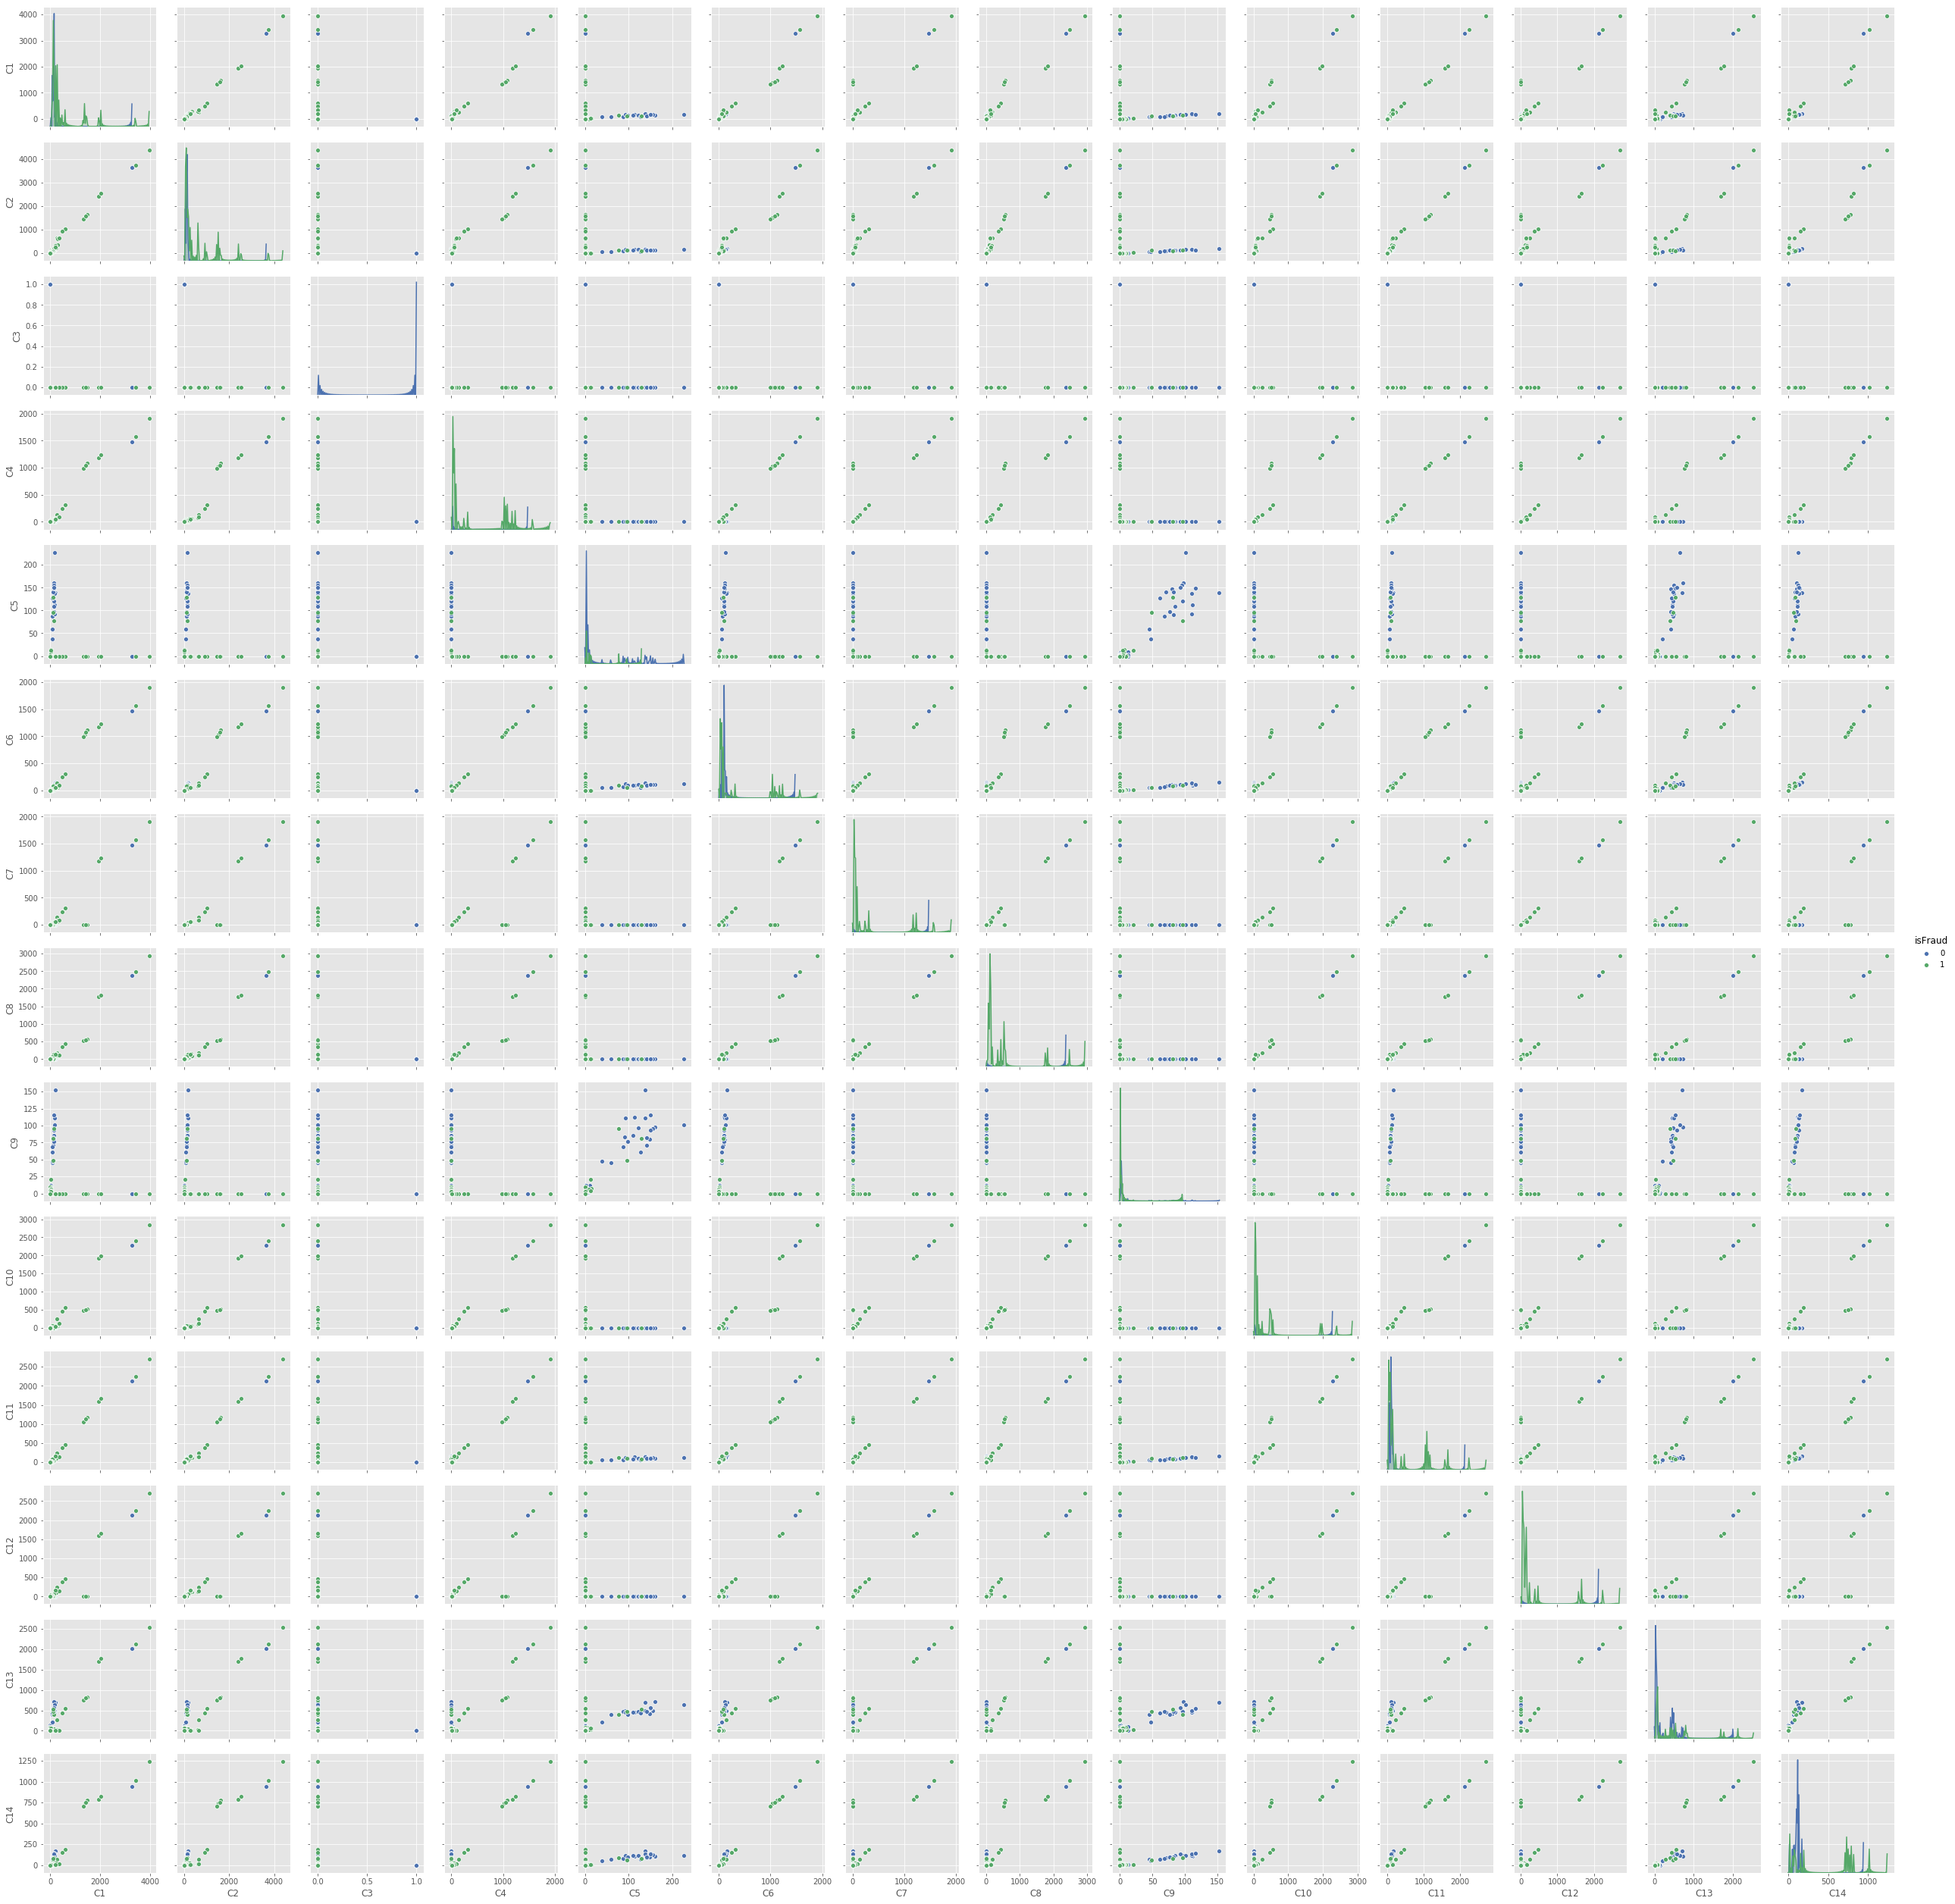

In [258]:
# Choose all columns starts with C, save into c_col
c_col = [c for c in sampled_train.columns if 'C' in c and c != 'ProductCD']

# Using searborn pairplot to plot the relationship between these features.
sns.pairplot(sampled_train, hue='isFraud',vars=c_col)
plt.show()

There is the pair plot for each column start with C:

It could be found that some features have a high correlation 

### D1-D15 :

For the columns D1-D15, We will using the same samples to have a look the relationship between each features.
Firstly, check the nan value distribution:
D6, D7, D8, D9, D12, D13, D14 have almost 90% non-values.

In [50]:
# Choose all columns start with D:

d_col = [d for d in sampled_train.columns if 'D' in d and (d != 'TransactionID')\
        and (d != 'TransactionDT') and (d != 'ProductCD')]

# Checking the missing values for D1-D9:

for col in d_col:
    
    print('{} - has {} NA values   {:.2f}% of total value'\
          .format(col, train_transaction[col].isna().sum(),\
                  train_transaction[col].isna().sum()/590540*100))

D1 - has 1269 NA values   0.21% of total value
D2 - has 280797 NA values   47.55% of total value
D3 - has 262878 NA values   44.51% of total value
D4 - has 168922 NA values   28.60% of total value
D5 - has 309841 NA values   52.47% of total value
D6 - has 517353 NA values   87.61% of total value
D7 - has 551623 NA values   93.41% of total value
D8 - has 515614 NA values   87.31% of total value
D9 - has 515614 NA values   87.31% of total value
D10 - has 76022 NA values   12.87% of total value
D11 - has 279287 NA values   47.29% of total value
D12 - has 525823 NA values   89.04% of total value
D13 - has 528588 NA values   89.51% of total value
D14 - has 528353 NA values   89.47% of total value
D15 - has 89113 NA values   15.09% of total value


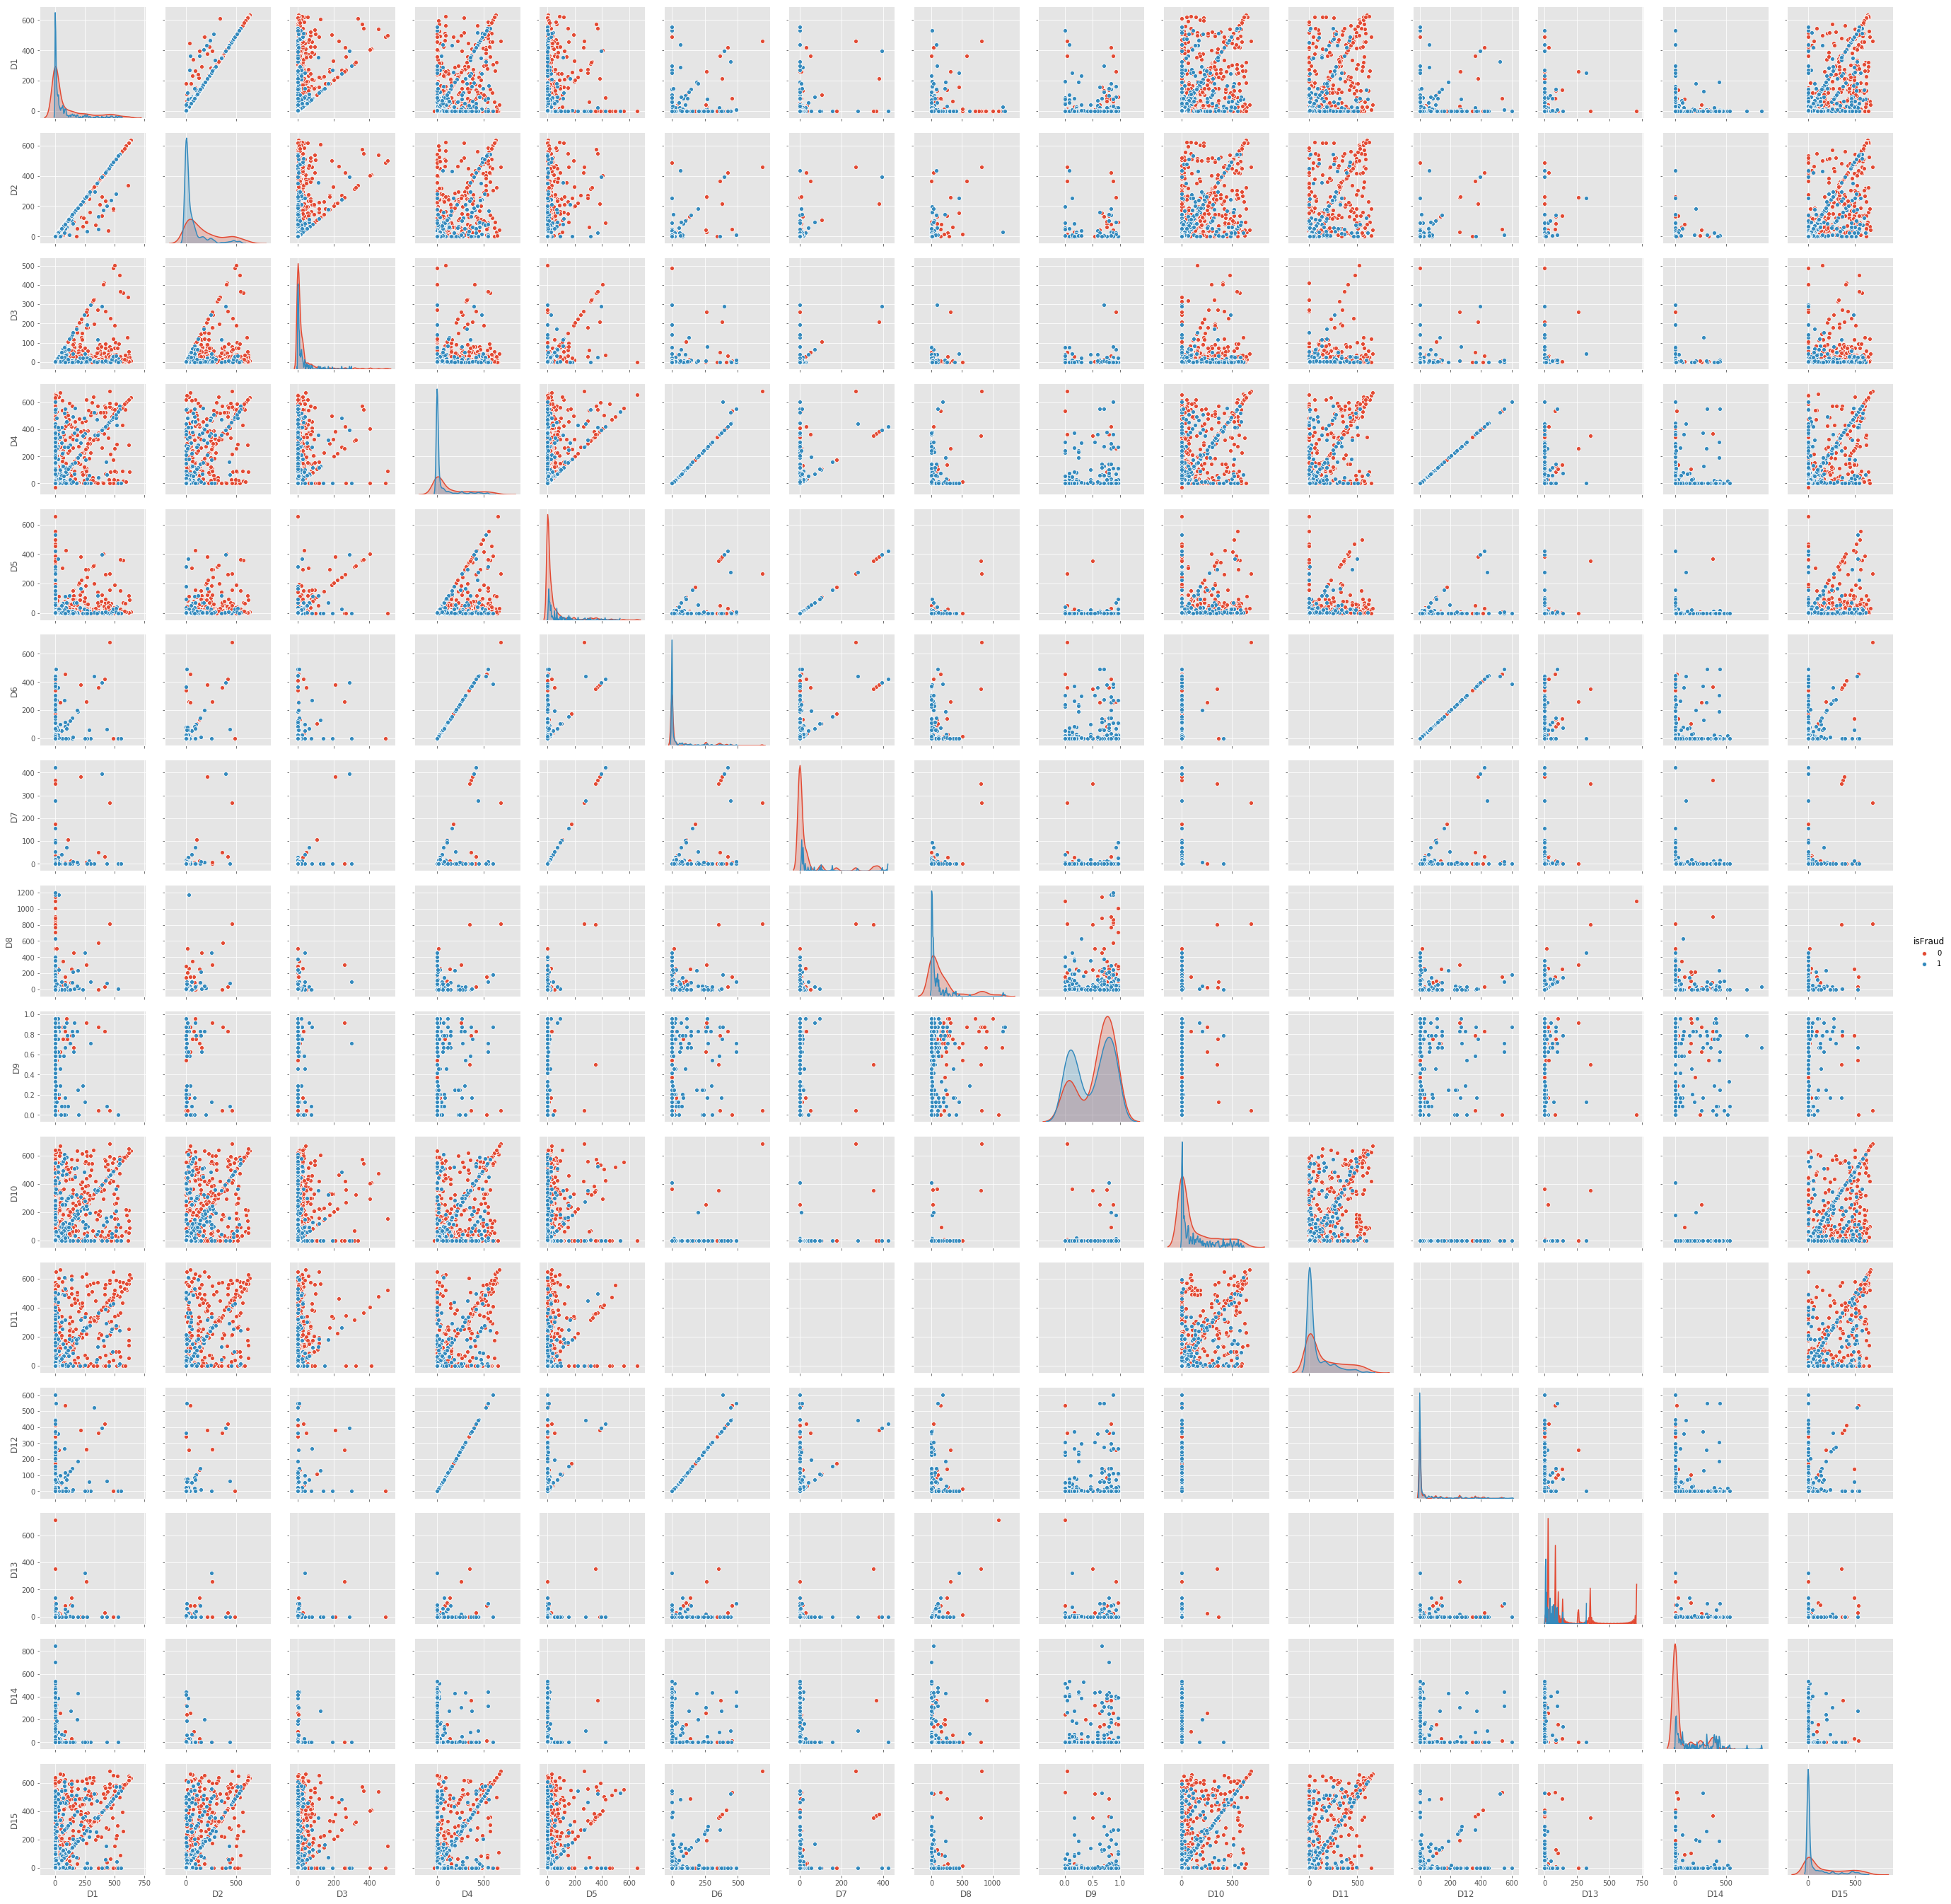

In [51]:
# Using searborn pairplot to plot the relationship between these features.
sns.pairplot(sampled_train, hue='isFraud',vars=d_col)
plt.show()

### M1-M9 Explore:

M1-M9 features are the values about T, F and NaN, we will count the number for each features:

Almost all M-features have 50% of nan values.


In [53]:
m_col = [c for c in train_transaction.columns if c[0] == 'M']
train_transaction[m_col].head()

M1   M2   M3   M4   M5   M6   M7   M8   M9
0    T    T    T   M2    F    T  NaN  NaN  NaN
1  NaN  NaN  NaN   M0    T    T  NaN  NaN  NaN
2    T    T    T   M0    F    F    F    F    F
3  NaN  NaN  NaN   M0    T    F  NaN  NaN  NaN
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN

In [54]:
# Checking the missing values for M1-M9:

for col in m_col:
    
    print('{} - has {} NA values   {:.2f}% of total value'\
          .format(col, train_transaction[col].isna().sum(),\
                  train_transaction[col].isna().sum()/590540*100))

M1 - has 271100 NA values   45.91% of total value
M2 - has 271100 NA values   45.91% of total value
M3 - has 271100 NA values   45.91% of total value
M4 - has 281444 NA values   47.66% of total value
M5 - has 350482 NA values   59.35% of total value
M6 - has 169360 NA values   28.68% of total value
M7 - has 346265 NA values   58.64% of total value
M8 - has 346252 NA values   58.63% of total value
M9 - has 346252 NA values   58.63% of total value


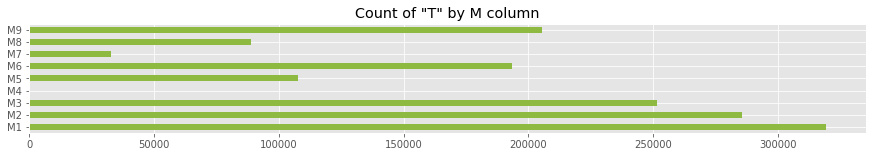

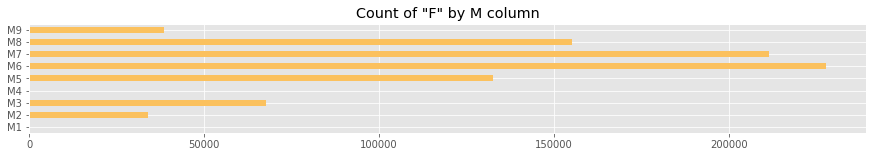

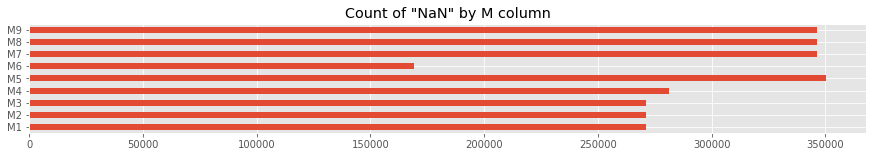

In [60]:
(train_transaction[m_col] == 'T').sum().plot(kind='barh',
                                              title='Count of "T" by M column',
                                              figsize=(15, 2),
                                              color=color_pal[5])
plt.show()
(train_transaction[m_col] == 'F').sum().plot(kind='barh',
                                              title='Count of "F" by M column',
                                              figsize=(15, 2),
                                              color=color_pal[4])
plt.show()
(train_transaction[m_col].isna()).sum().plot(kind='barh',
                                              title='Count of "NaN" by M column',
                                              figsize=(15, 2),
                                              color=color_pal[0])
plt.show()

M4 doesn't have any value of 'F' or 'T', we have to find out the value in M4:

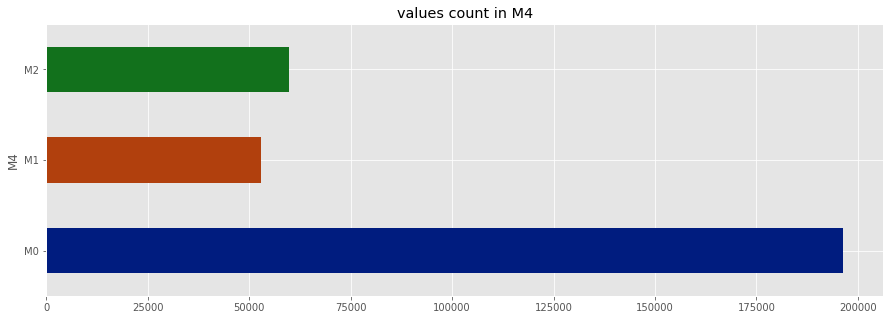

In [69]:
train_transaction.groupby('M4')['TransactionID']\
.count().plot(kind='barh',title='values count in M4',\
              figsize=(15,5),
              color=sns.color_palette("dark", 6))
plt.show()

### V1 - V339 Explore:

There are 339 columns start with V, we will explore it's distribution

There are 159 features have more than 50% missing values

There are 159 features have more than 70% missing values

There are 47 features have more than 80% missing values

In [70]:
v_col = [c for c in train_transaction.columns if c[0] == 'V']
train_transaction[v_col].head()

V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  ...  V330  V331  V332  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   NaN   NaN   NaN   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
2  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  ...   NaN   NaN   NaN   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   NaN   NaN   NaN   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...   0.0   0.0   0.0   

   V333  V334  V335  V336  V337  V338  V339  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 339 columns]

In [71]:
train_transaction[v_col].describe()

V1             V2             V3             V4  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.999945       1.045204       1.078075       0.846456   
std         0.007390       0.240133       0.320890       0.440053   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         1.000000       8.000000       9.000000       6.000000   

                  V5             V6             V7             V8  \
count  311253.000000  311253.000000  311253.000000  311253.000000   
mean        0.876991       1.045686       1.072870       1.027704   
std         0.475902       0.239385       0.304779       0.186069   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       1.000000       1.000000   
50%         1.000000       1.000000       1.000000       1.000000   
75%         1.000000       1.000000       1.000000       1.000000   
max         6.000000       9.000000       9.000000       8.000000   

                  V9            V10  ...          V330           V331  \
count  311253.000000  311253.000000  ...  82351.000000   82351.000000   
mean        1.041529       0.463915  ...      0.775874     721.741883   
std         0.226339       0.521522  ...      4.727971    6217.223583   
min         0.000000       0.000000  ...      0.000000       0.000000   
25%         1.000000       0.000000  ...      0.000000       0.000000   
50%         1.000000       0.000000  ...      0.000000       0.000000   
75%         1.000000       1.000000  ...      0.000000       0.000000   
max         8.000000       4.000000  ...     55.000000  160000.000000   

                V332           V333          V334         V335          V336  \
count   82351.000000   82351.000000  82351.000000  82351.00000  82351.000000   
mean     1375.783644    1014.622782      9.807015     59.16455     28.530903   
std     11169.275702    7955.735482    243.861391    387.62948    274.576920   
min         0.000000       0.000000      0.000000      0.00000      0.000000   
25%         0.000000       0.000000      0.000000      0.00000      0.000000   
50%         0.000000       0.000000      0.000000      0.00000      0.000000   
75%        25.000000       0.000000      0.000000      0.00000      0.000000   
max    160000.000000  160000.000000  55125.000000  55125.00000  55125.000000   

                V337           V338           V339  
count   82351.000000   82351.000000   82351.000000  
mean       55.352422     151.160542     100.700882  
std       668.486833    1095.034387     814.946722  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000  
max    104060.000000  104060.000000  104060.000000  

[8 rows x 339 columns]

In [80]:
# Checking the missing values for V1-V339 and print out the missing value >70%:
count0=0
count=0
count1 =0
missing_cols_v =[]
for col in v_col:
    
    if (train_transaction[col].isna().sum()/590540*100)>50:
        count0+=1
        missing_cols_v.append(col)
    if (train_transaction[col].isna().sum()/590540*100)>70:
        count+=1
    if (train_transaction[col].isna().sum()/590540*100)>80:
        count1+=1
print(f'There are {count0} features have more than 50% missing values')        
print(f'There are {count} features have more than 70% missing values')
print(f'There are {count1} features have more than 80% missing values')
#print(missing_cols_v)

There are 159 features have more than 50% missing values
There are 159 features have more than 70% missing values
There are 47 features have more than 80% missing values


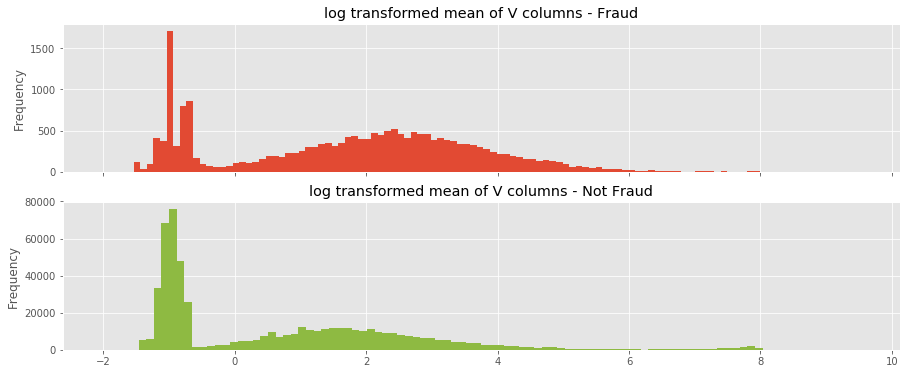

In [82]:
# We will generate a v_mean column to get the mean value for each row, and then plot them.

train_transaction['v_mean'] = train_transaction[v_col].mean(axis=1)

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15, 6))
train_transaction.loc[train_transaction['isFraud'] == 1]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Fraud',
          ax=ax1)
train_transaction.loc[train_transaction['isFraud'] == 0]['v_mean'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='log transformed mean of V columns - Not Fraud',
          color=color_pal[5],
          ax=ax2)
plt.show()


### id_35 - id_38 from train_identity 

The value for these four columns are fitted with T, F, NaN.

id_35 - has 3248 NA values   0.55% of total value
id_36 - has 3248 NA values   0.55% of total value
id_37 - has 3248 NA values   0.55% of total value
id_38 - has 3248 NA values   0.55% of total value


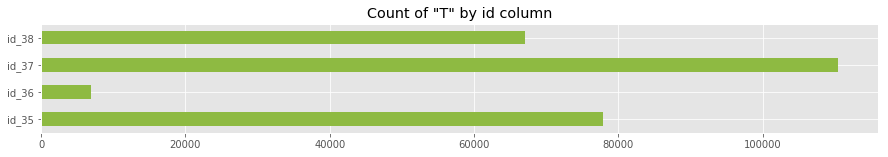

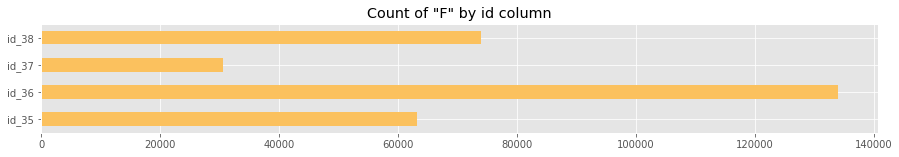

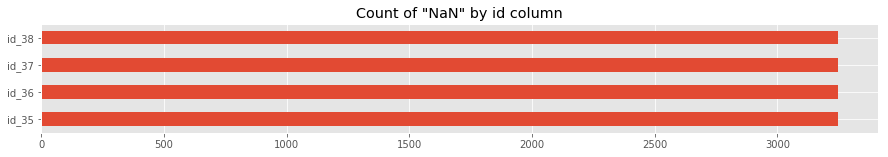

In [106]:
# Checking the missing values for id_35 - id_38:

id_col = ['id_35','id_36','id_37','id_38']

for col in id_col:
    
    print('{} - has {} NA values   {:.2f}% of total value'\
          .format(col, train_identity[col].isna().sum(),\
                  train_identity[col].isna().sum()/590540*100))
    


(train_identity[id_col] == 'T').sum().plot(kind='barh',
                                              title='Count of "T" by id column',
                                              figsize=(15, 2),
                                              color=color_pal[5])
plt.show()
(train_identity[id_col] == 'F').sum().plot(kind='barh',
                                              title='Count of "F" by id column',
                                              figsize=(15, 2),
                                              color=color_pal[4])
plt.show()
(train_identity[id_col].isna()).sum().plot(kind='barh',
                                              title='Count of "NaN" by id column',
                                              figsize=(15, 2),
                                              color=color_pal[0])
plt.show()

### id_ columns with numerical values:



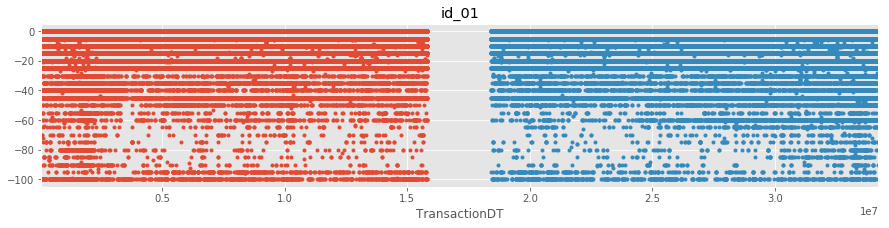

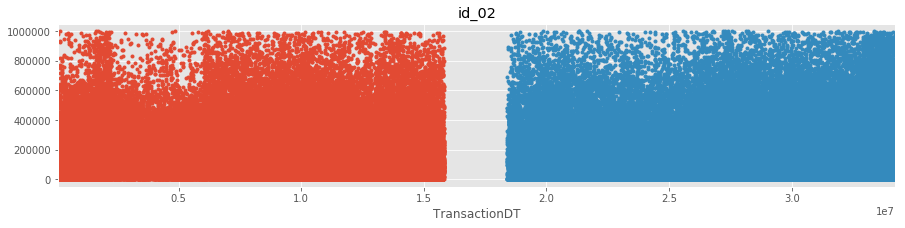

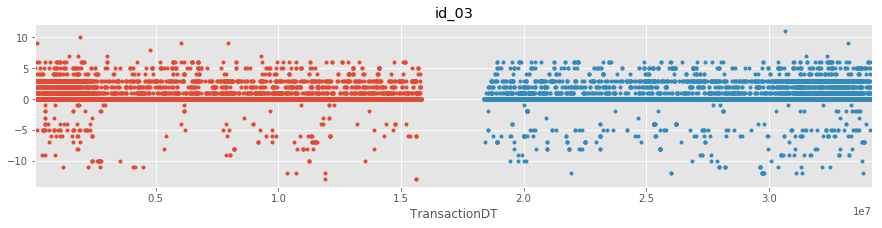

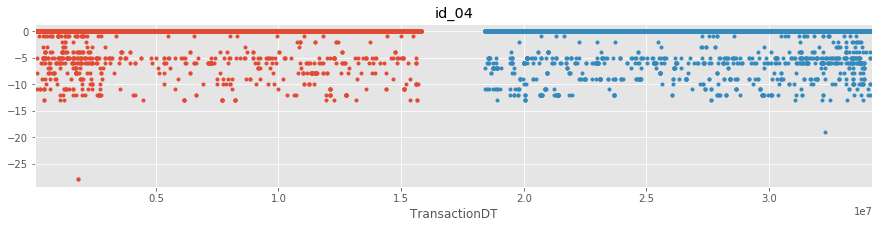

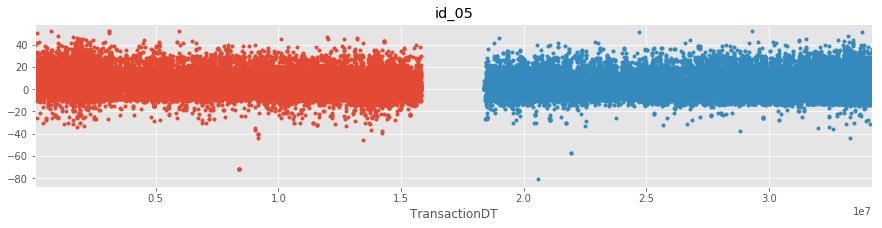

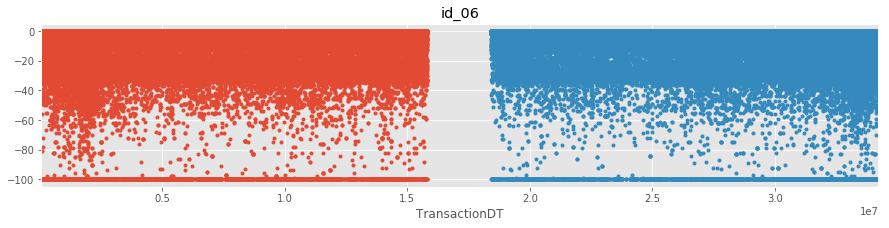

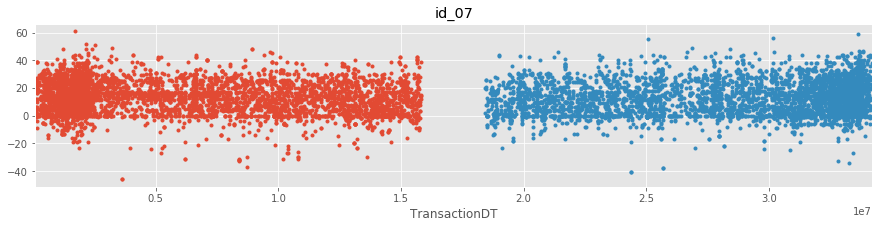

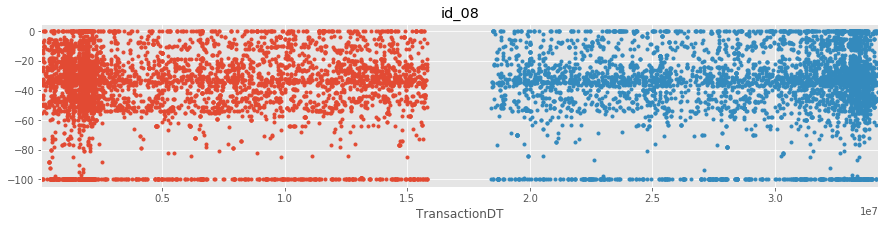

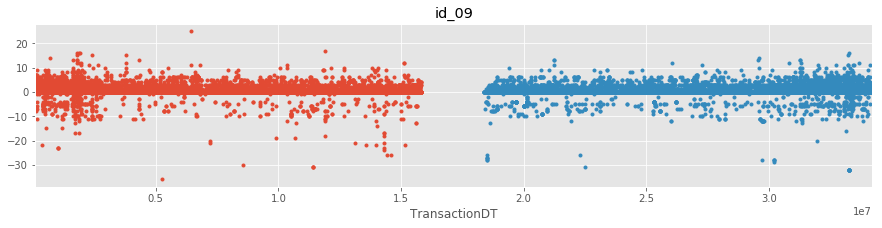

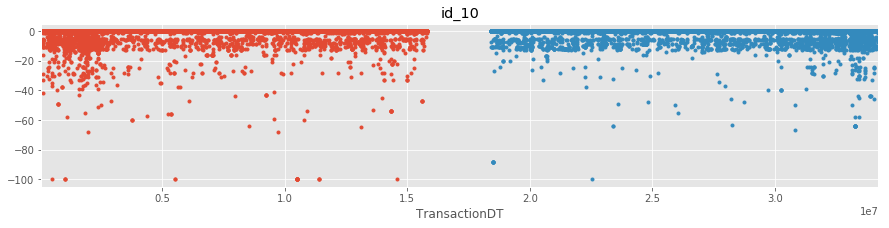

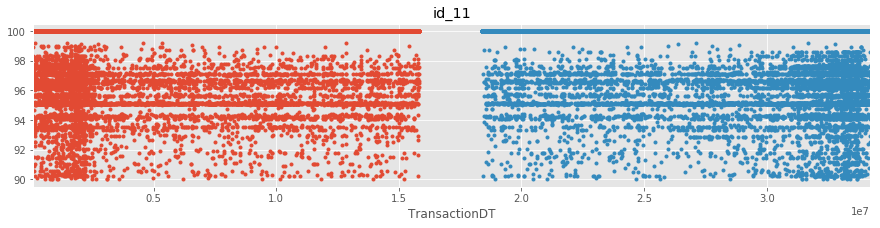

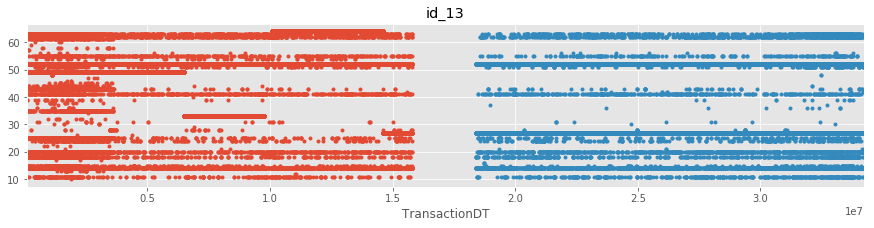

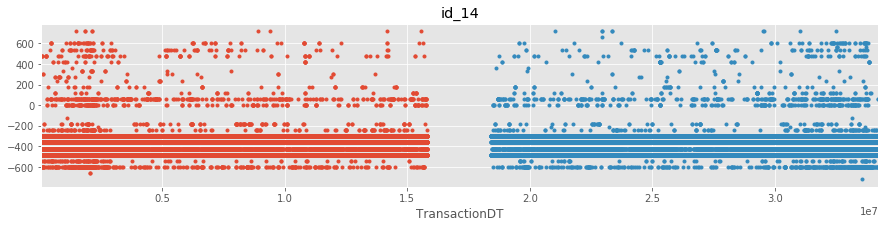

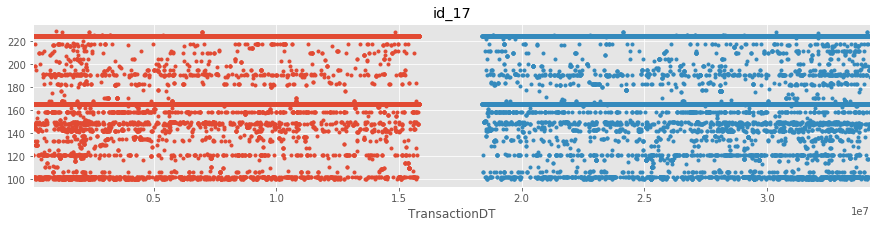

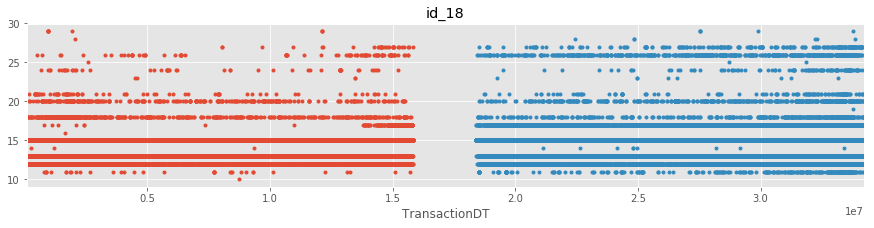

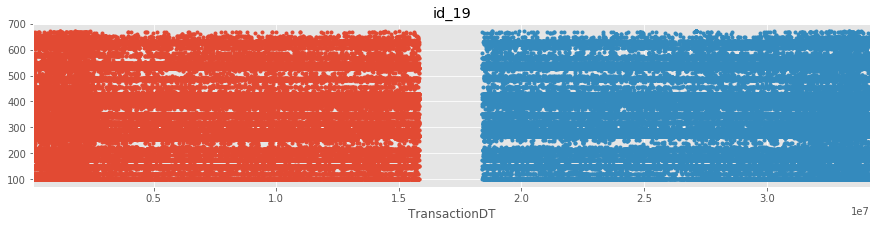

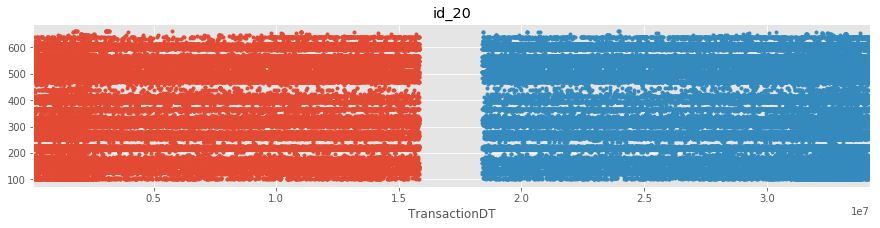

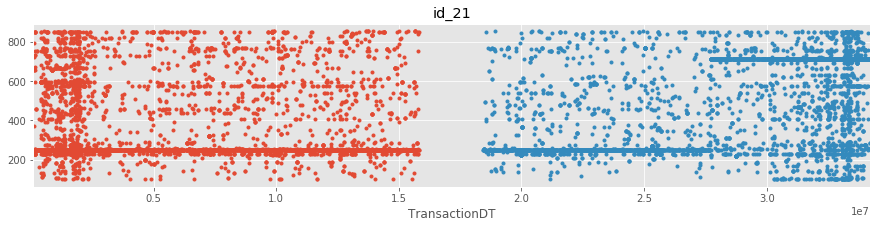

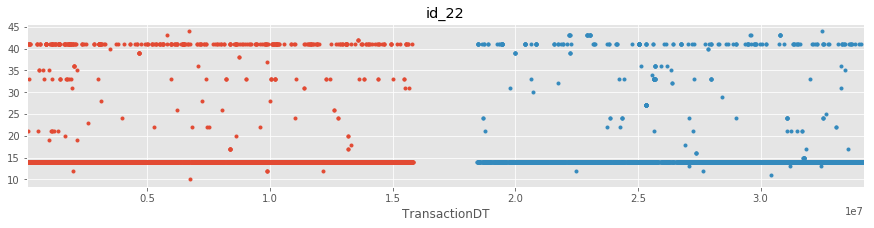

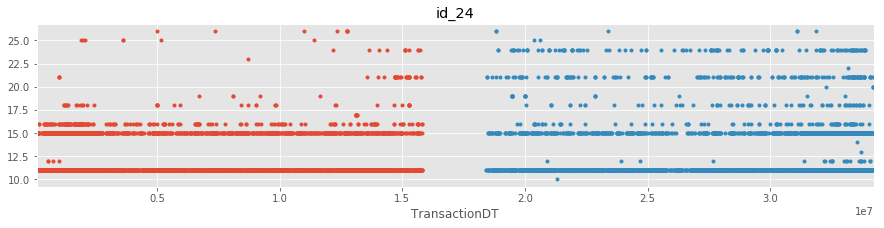

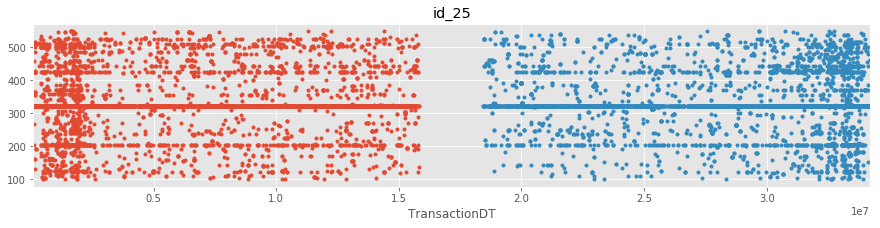

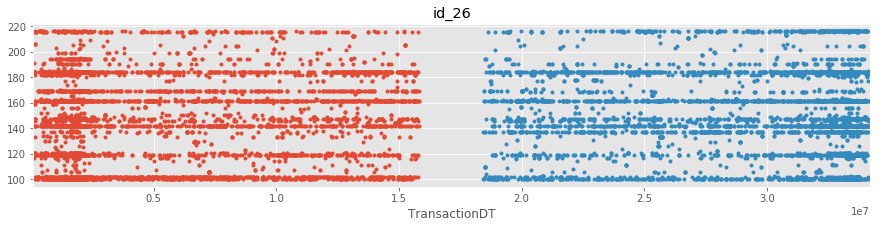

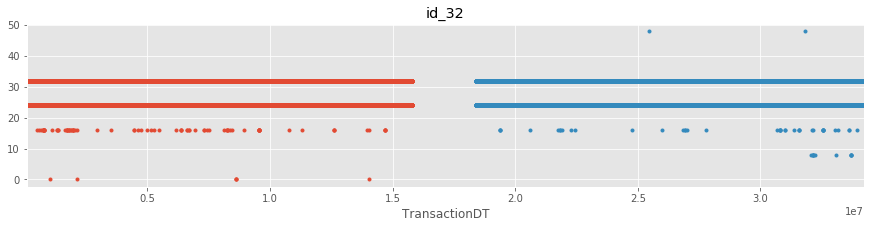

In [119]:
# Look at the distribution based on date, comparing with same data in testing datasets.

test_identity_ = test_identity.merge(test_transaction[['TransactionID',
                                                      'TransactionDT']],
                                    on=['TransactionID'])

id_cols = [c for c in train_identity.columns if 'id' in c]
for i in id_cols:
    try:
        train_identity_.set_index('TransactionDT')[i].plot(style='.', title=i, figsize=(15, 3))
        test_identity_.set_index('TransactionDT')[i].plot(style='.', title=i, figsize=(15, 3))
        plt.show()
    except TypeError:
        pass

# ------------------------------------EDA FINISHED --------------------------------